## ARIMA MODEL FOR TIME SERIES

    personal interpreation : i think thats a poor prediction, come back and correct it
    
    helpchat : https://chat.openai.com/chat/3b91bf15-854e-4018-956d-4e5ef98756f0
    
    arima model : https://www.youtube.com/watch?v=3UmyHed0iYE
    
    prog_tut : https://www.youtube.com/watch?v=8FCDpFhd1zk

In [9]:
'''
1) read data
2) check info and display head
3) plot it 
4) convert the date datatype from object to datetime
5) select feature required and make date as the index for time series
6) use auto_arima to find the best parameters to pass 
7) make a arima model fit and predict the result
8) plot the result
'''

'\n1) read data\n2) check info and display head\n3) plot it \n4) convert the date datatype from object to datetime\n5) select feature required and make date as the index for time series\n6) use auto_arima to find the best parameters to pass \n7) make a arima model fit and predict the result\n8) plot the result\n'

In [10]:
import numpy as np
import seaborn as sns

In [11]:
import pandas as pd

In [12]:
data_file = pd.read_csv('dataset/GOOG.csv')

In [13]:
data_file.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-08-09,1197.989990,1203.880005,1183.603027,1188.010010,1188.010010,1065700
1,2019-08-12,1179.209961,1184.959961,1167.671997,1174.709961,1174.709961,1003000
2,2019-08-13,1171.459961,1204.780029,1171.459961,1197.270020,1197.270020,1294400
3,2019-08-14,1176.310059,1182.300049,1160.540039,1164.290039,1164.290039,1578700
4,2019-08-15,1163.500000,1175.839966,1162.109985,1167.260010,1167.260010,1218700


In [14]:
# displaying the stocks according to date

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

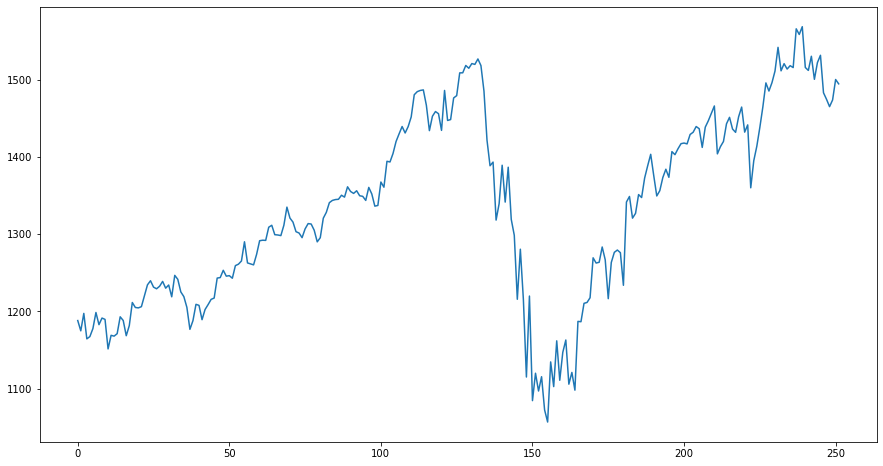

In [16]:
plt.figure(figsize=(15,8))
plt.plot(data_file['Close'])

In [17]:
from statsmodels.tsa.arima_model import ARIMA

In [18]:
# lets initialize the model and set the daily_seasonality to true
# model = Prophet(daily_seasonality=True)

In [19]:
data_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       252 non-null    object 
 1   Open       252 non-null    float64
 2   High       252 non-null    float64
 3   Low        252 non-null    float64
 4   Close      252 non-null    float64
 5   Adj Close  252 non-null    float64
 6   Volume     252 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


In [20]:
# make training data
train_data = data_file.loc[:, ['Date', 'Close']]

In [21]:
train_data.head()
train_data.isnull().sum()

Date     0
Close    0
dtype: int64

In [22]:
# we need to convert it to daytime object for our model to process

In [23]:
print(train_data['Date'].dtype)

object


In [24]:
train_data['Date'] = pd.to_datetime(train_data['Date'])

In [25]:
print(train_data['Date'].dtype)

datetime64[ns]


In [26]:
# we are going to make the date as the index value

In [27]:
train_data.head()

,Date,Close
0,2019-08-09,1188.010010
1,2019-08-12,1174.709961
2,2019-08-13,1197.270020
3,2019-08-14,1164.290039
4,2019-08-15,1167.260010


In [28]:
train_data = train_data.set_index('Date')

In [29]:
train_data.head()

,Close
Date,
2019-08-09,1188.010010
2019-08-12,1174.709961
2019-08-13,1197.270020
2019-08-14,1164.290039
2019-08-15,1167.260010


In [30]:
import pmdarima

In [31]:
from pmdarima.arima import auto_arima

In [39]:
stepwise_fit = auto_arima(train_data, trace=True, supress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=2353.376, Time=0.28 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2391.917, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2366.380, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2370.282, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2390.389, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=2368.998, Time=0.17 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=2367.797, Time=0.20 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=2362.185, Time=0.30 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=2349.049, Time=0.49 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=2364.887, Time=0.31 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=2357.293, Time=0.50 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=2348.178, Time=0.55 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=2366.011, Time=0.33 sec
 ARIMA(3,1,4)(0,0,0)[0] intercept   : AIC=2348.086, Time=0.54 sec
 ARIMA(4,1,4)(0,0,0)[0] intercept

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  252
Model:               SARIMAX(3, 1, 4)   Log Likelihood               -1165.248
Date:                Fri, 07 Apr 2023   AIC                           2346.495
Time:                        13:19:12   BIC                           2374.699
Sample:                             0   HQIC                          2357.845
                                - 252                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9618      0.107     -9.029      0.000      -1.171      -0.753
ar.L2          0.6382      0.194      3.288      0.001       0.258       1.019
ar.L3          0.8252      0.105      7.881      0.000       0.620       1.030
ma.L1          0.7567      0.113      6.712      0.000       0.536       0.978
ma.L2         -0.8779      0.197     -4.454      0.000      -1.264      -0.492
ma.L3         -0.5621      0.105     -5.338      0.000      -0.768      -0.356
ma.L4          0.2800      0.050      5.656      0.000       0.183       0.377
sigma2       623.8914     46.668     13.369      0.000     532.423     715.360
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):                53.74
Prob(Q):                              0.83   Prob(JB):                         0.00
Heteroskedasticity (H):               3.29   Skew:                            -0.60
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.93
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [70]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train_data, order=(3,1,4))

C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [71]:
model_fit = model.fit()

In [72]:
predictions = model_fit.forecast(steps=36)

C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [73]:
predictions.head()

252    1494.425290
253    1492.998872
254    1493.564778
255    1494.152866
256    1492.771255
Name: predicted_mean, dtype: float64

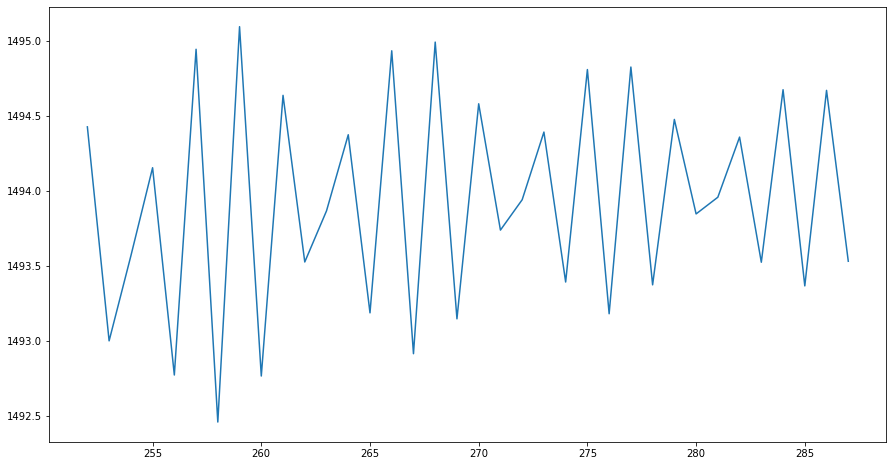

In [74]:
plt.figure(figsize = (15,8))
plt.plot(predictions)

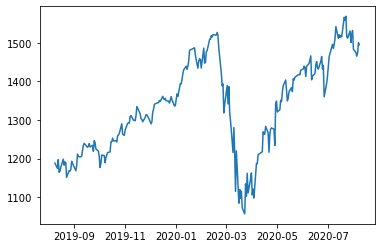

In [75]:
plt.plot(train_data)